In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
import random
from tensorflow.keras import Model, layers

In [2]:
a = tf.constant(2, dtype = tf.int32)
b = tf.constant(3, dtype = tf.int32)

tf.print(a+b)

5


step: 0, loss: 0.220464, W: 0.335598, b: 0.108583
step: 100, loss: 0.189935, W: 0.327780, b: 0.258968
step: 200, loss: 0.176045, W: 0.311350, b: 0.375451
step: 300, loss: 0.167503, W: 0.298465, b: 0.466800
step: 400, loss: 0.162250, W: 0.288360, b: 0.538438
step: 500, loss: 0.159019, W: 0.280435, b: 0.594618
step: 600, loss: 0.157032, W: 0.274221, b: 0.638676
step: 700, loss: 0.155810, W: 0.269347, b: 0.673227
step: 800, loss: 0.155058, W: 0.265526, b: 0.700323
step: 900, loss: 0.154596, W: 0.262528, b: 0.721572


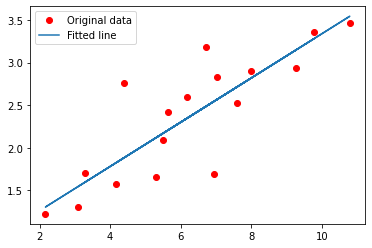

In [3]:
# Linear Regression

# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

# Weight and Bias
W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())


# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b


# Mean square error
def mean_square(pred, label):
    return tf.reduce_mean(tf.square(pred - label))

def run_optimization_linearReg():
    with tf.GradientTape() as g:
        pred = linear_regression(train_X)
        loss = mean_square(pred, train_Y)
        
    gradients = g.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
# SGD Optimizer
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

# Training
for step in range(num_steps):

    run_optimization_linearReg()

    if step % display_step == 0:
        pred = linear_regression(train_X)
        loss = mean_square(pred, train_Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()


step: 250, loss: 1.059271, accuracy: 0.820312
step: 500, loss: 0.893437, accuracy: 0.765625
step: 750, loss: 0.727417, accuracy: 0.843750
step: 1000, loss: 0.624006, accuracy: 0.843750
step: 1250, loss: 0.580954, accuracy: 0.851562
step: 1500, loss: 0.557619, accuracy: 0.878906
step: 1750, loss: 0.488821, accuracy: 0.898438
step: 2000, loss: 0.482208, accuracy: 0.867188
Test Accuracy: 0.885200


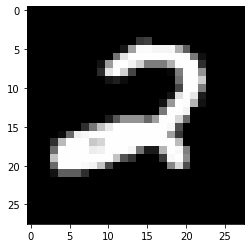

Model prediction: 2


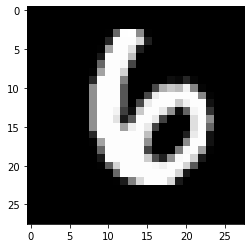

Model prediction: 6


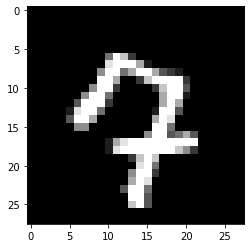

Model prediction: 7


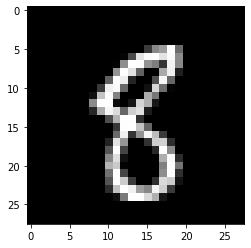

Model prediction: 8


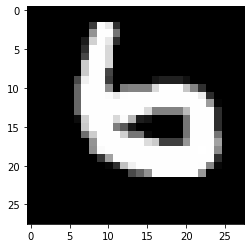

Model prediction: 6


In [4]:
# Logistic Regression

# MNIST dataset parameters
num_classes = 10
num_features = 784

# Training parameters
learning_rate = 0.01
training_steps = 2000
batch_size = 256
display_steps = 250

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train/255, x_test/255

# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(20000).batch(batch_size).prefetch(1)

# Weight of shape [784, 10], the 28*28 image features, and total number of classes.
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")

# logistic regression (Wx + b)
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    # ****************
    # softmax is a generalization of sigmoid function
    # sigmoid function is specifiically for binary classification
    # ****************
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy_LogReg(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

# Accuracy metric.
def accuracy_LogReg(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

def run_optimization_LogReg(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy_LogReg(pred, y)
        
    gradients = g.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

for step, (batch_x, batch_y) in enumerate (train_data.take(training_steps), 1):
    run_optimization_LogReg(batch_x, batch_y)
    
    if step % display_steps == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy_LogReg(pred, batch_y)
        acc = accuracy_LogReg(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
        
# Test model on validation set.
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy_LogReg(pred, y_test))

# Predict 5 images from validation set.
n_images = 5
test_images = random.choices(x_test, k = n_images)
predictions = logistic_regression(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

step: 250, loss: 0.879965, accuracy: 0.828125
step: 500, loss: 0.498853, accuracy: 0.882812
step: 750, loss: 0.443448, accuracy: 0.878906
step: 1000, loss: 0.445201, accuracy: 0.886719
step: 1250, loss: 0.279642, accuracy: 0.937500
step: 1500, loss: 0.329320, accuracy: 0.917969
step: 1750, loss: 0.351906, accuracy: 0.886719
step: 2000, loss: 0.283084, accuracy: 0.906250
Test Accuracy: 0.917100


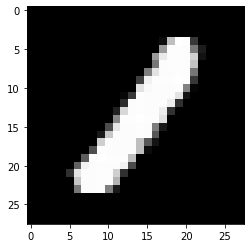

Model prediction: 1


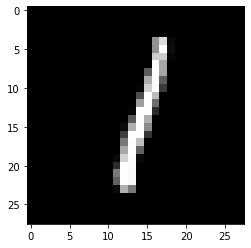

Model prediction: 1


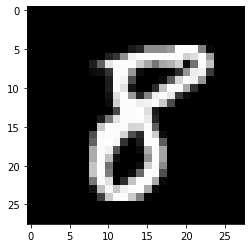

Model prediction: 8


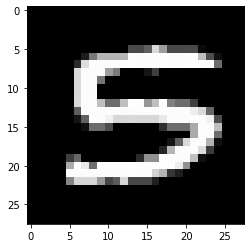

Model prediction: 5


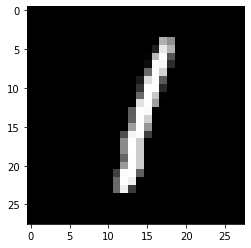

Model prediction: 1


In [5]:
# Neural Network

# MNIST dataset parameters
num_classes = 10
num_features = 784

# Training parameters
learning_rate = 0.01
training_steps = 2000
batch_size = 256
display_steps = 250

# Network parameters
n_hidden_1 = 256
n_hidden_2 = 128

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train/255, x_test/255

# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(20000).batch(batch_size).prefetch(1)

# Create NN model
class Neural_Network(Model):
    # Set layers
    def __init__(self):
        super(Neural_Network, self).__init__();
        # 1st fully connected hidden layer
        self.fc1 = layers.Dense(n_hidden_1, activation = tf.nn.relu)
        # 2nd fully connected hidden layer
        self.fc2 = layers.Dense(n_hidden_2, activation = tf.nn.relu)
        # Output layer
        self.out = layers.Dense(num_classes)
        
    # Set forward pass
    def call(self, x, is_training = False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build NN model
neural_network = Neural_Network()

# Cross-Entropy loss function.
def cross_entropy_NN(y_pred, y_true):
    # Convert labels to int64 for tf cross-entropy function
    y_true = tf.cast(y_true, tf.int64)
    # Apply softmax to logits and compute cross-entropy
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y_true, logits = y_pred)
    # Average loss across batch
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy_NN(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis = -1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

# Optimization process
def run_optimization_NN(x, y):
    with tf.GradientTape() as g:
        pred = neural_network(x, is_training = True)
        loss = cross_entropy_NN(pred, y)
        
    trainable_variables = neural_network.trainable_variables
    
    gradients = g.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables))

for step, (batch_x, batch_y) in enumerate (train_data.take(training_steps), 1):
    run_optimization_NN(batch_x, batch_y)
    
    if step % display_steps == 0:
        pred = neural_network(batch_x, is_training = True)
        loss = cross_entropy_NN(pred, batch_y)
        acc = accuracy_NN(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
        
# Test model on validation set.
pred = neural_network(x_test, is_training = False)
print("Test Accuracy: %f" % accuracy_NN(pred, y_test))

# Predict 5 images from validation set.
n_images = 5
test_images = np.array(random.choices(x_test, k = n_images))
predictions = neural_network(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

step: 250, loss: 0.246269, accuracy: 0.937500
step: 500, loss: 0.098939, accuracy: 0.972656
step: 750, loss: 0.074714, accuracy: 0.976562
step: 1000, loss: 0.062013, accuracy: 0.976562
step: 1250, loss: 0.044152, accuracy: 0.992188
step: 1500, loss: 0.045576, accuracy: 0.988281
step: 1750, loss: 0.073389, accuracy: 0.984375
step: 2000, loss: 0.011978, accuracy: 1.000000
Test Accuracy: 0.979000


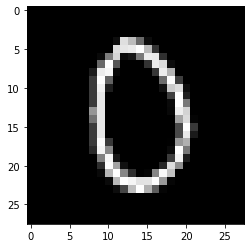

Model prediction: 0


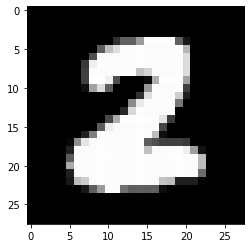

Model prediction: 2


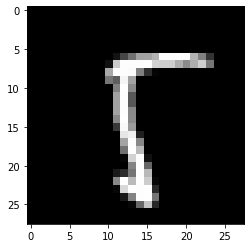

Model prediction: 5


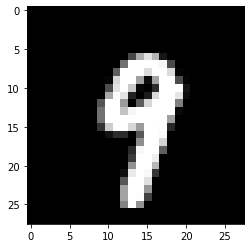

Model prediction: 9


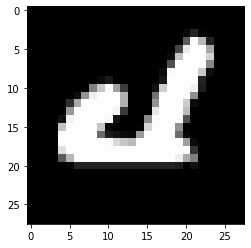

Model prediction: 4


In [12]:
# Recurrent Neural Network

# MNIST dataset parameters
num_classes = 10
num_features = 784

# Training parameters
learning_rate = 0.01
training_steps = 2000
batch_size = 256
display_steps = 250

# Network Parameters
# MNIST image shape is 28*28px, we will then handle 28 sequences of 28 timesteps for every sample.
num_input = 28 # number of sequences.
timesteps = 28 # timesteps.
num_units = 32 # number of neurons for the LSTM layer.

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, 28, 28]), x_test.reshape([-1, 28, 28])
x_train, x_test = x_train/255, x_test/255

# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(20000).batch(batch_size).prefetch(1)

# Create LSTM model
class Recurrent_Network(Model):
    # Set layers
    def __init__(self):
        super(Recurrent_Network, self).__init__();
        # LSTM layer
        self.lstm = layers.LSTM(units = num_units)
        # Output layer
        self.out = layers.Dense(num_classes)
    
    # Set forward pass
    def call(self, x, is_training = False):
        x = self.lstm(x)
        x = self.out(x)
        
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x
    
# Build RNN model
recurrent_network = Recurrent_Network()

# Cross-Entropy loss function.
def cross_entropy_RNN(y_pred, y_true):
    # Convert labels to int64 for tf cross-entropy function
    y_true = tf.cast(y_true, tf.int64)
    # Apply softmax to logits and compute cross-entropy
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y_true, logits = y_pred)
    # Average loss across batch
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy_RNN(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis = -1)

# Adam gradient descent optimizer.
# *******************
# SGD gives much worse results, so changed to Adam
# *******************
optimizer = tf.optimizers.Adam(learning_rate)

# Optimization process
def run_optimization_RNN(x, y):
    with tf.GradientTape() as g:
        pred = recurrent_network(x, is_training = True)
        loss = cross_entropy_RNN(pred, y)
        
    trainable_variables = recurrent_network.trainable_variables
    
    gradients = g.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables))

for step, (batch_x, batch_y) in enumerate (train_data.take(training_steps), 1):
    run_optimization_RNN(batch_x, batch_y)
    
    if step % display_steps == 0:
        pred = recurrent_network(batch_x, is_training = True)
        loss = cross_entropy_RNN(pred, batch_y)
        acc = accuracy_RNN(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
        
# Test model on validation set.
pred = recurrent_network(x_test, is_training = False)
print("Test Accuracy: %f" % accuracy_RNN(pred, y_test))

# Predict 5 images from validation set.
n_images = 5
test_images = np.array(random.choices(x_test, k = n_images))
predictions = recurrent_network(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

In [ ]:
# Bidirectional Recurrent Neural Network

# Recurrent Neural Network

# MNIST dataset parameters
num_classes = 10
num_features = 784

# Training parameters
learning_rate = 0.01
training_steps = 2000
batch_size = 256
display_steps = 250

# Network Parameters
# MNIST image shape is 28*28px, we will then handle 28 sequences of 28 timesteps for every sample.
num_input = 28 # number of sequences.
timesteps = 28 # timesteps.
num_units = 32 # number of neurons for the LSTM layer.

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, 28, 28]), x_test.reshape([-1, 28, 28])
x_train, x_test = x_train/255, x_test/255

# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(20000).batch(batch_size).prefetch(1)

# Create BiRNN model
class Bi_Recurrent_Network(Model):
    # Set layers
    def __init__(self):
        super(Bi_Recurrent_Network, self).__init__();
        # Forward and backward LSTM layer
        lstm_forward = layers.LSTM(units = num_units)
        lstm_backward = layers.LSTM(units = num_units, go_backwards = True)
        # Bi-directional LSTM layer
        self.bi_lstm = layers.Bidirectional(lstm_forward, backward_layer = lstm_backward)
        # Output layer
        self.out = layers.Dense(num_classes)
    
    # Set forward pass
    def call(self, x, is_training = False):
        x = self.bi_lstm(x)
        x = self.out(x)
        
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x
    
# Build BiRNN model
bi_recurrent_network = Bi_Recurrent_Network()

# Cross-Entropy loss function.
def cross_entropy_BiRNN(y_pred, y_true):
    # Convert labels to int64 for tf cross-entropy function
    y_true = tf.cast(y_true, tf.int64)
    # Apply softmax to logits and compute cross-entropy
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y_true, logits = y_pred)
    # Average loss across batch
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy_BiRNN(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis = -1)

# Adam gradient descent optimizer.
# *******************
# SGD gives much worse results, so changed to Adam
# *******************
optimizer = tf.optimizers.Adam(learning_rate)

# Optimization process
def run_optimization_BiRNN(x, y):
    with tf.GradientTape() as g:
        pred = bi_recurrent_network(x, is_training = True)
        loss = cross_entropy_RNN(pred, y)
        
    trainable_variables = bi_recurrent_network.trainable_variables
    
    gradients = g.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables))

for step, (batch_x, batch_y) in enumerate (train_data.take(training_steps), 1):
    run_optimization_BiRNN(batch_x, batch_y)
    
    if step % display_steps == 0:
        pred = bi_recurrent_network(batch_x, is_training = True)
        loss = cross_entropy_BiRNN(pred, batch_y)
        acc = accuracy_BiRNN(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
        
# Test model on validation set.
pred = bi_recurrent_network(x_test, is_training = False)
print("Test Accuracy: %f" % accuracy_BiRNN(pred, y_test))

# Predict 5 images from validation set.
n_images = 5
test_images = np.array(random.choices(x_test, k = n_images))
predictions = bi_recurrent_network(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

step: 250, loss: 0.095888, accuracy: 0.972656
step: 500, loss: 0.055463, accuracy: 0.992188
step: 750, loss: 0.080702, accuracy: 0.976562
step: 1000, loss: 0.058852, accuracy: 0.984375
step: 1250, loss: 0.077481, accuracy: 0.976562
step: 1500, loss: 0.038285, accuracy: 0.988281


step: 250, loss: 0.076185, accuracy: 0.968750
step: 500, loss: 0.103373, accuracy: 0.976562
step: 750, loss: 0.059753, accuracy: 0.980469
step: 1000, loss: 0.082616, accuracy: 0.972656
step: 1250, loss: 0.020023, accuracy: 0.996094
step: 1500, loss: 0.129212, accuracy: 0.957031
step: 1750, loss: 0.069337, accuracy: 0.976562
step: 2000, loss: 0.105813, accuracy: 0.960938
Test Accuracy: 0.963600


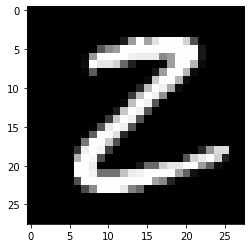

Model prediction: 2


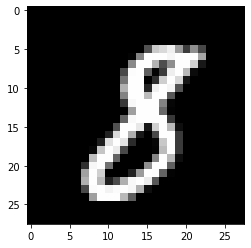

Model prediction: 8


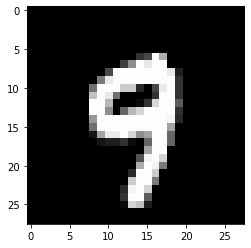

Model prediction: 9


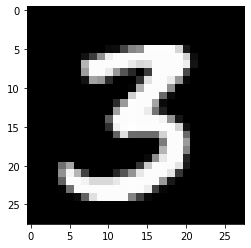

Model prediction: 3


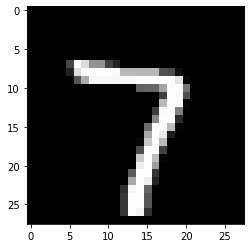

Model prediction: 7


In [11]:
# Convolutional Neural Network

# MNIST dataset parameters
num_classes = 10
num_features = 784

# Training parameters
learning_rate = 0.01
training_steps = 2000
batch_size = 256
display_steps = 250

# Network Parameters
conv1_filter = 32
conv2_filter = 64
fc_units = 1024

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train/255, x_test/255

# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(20000).batch(batch_size).prefetch(1)

# Create CNN model
class Convolutional_Network(Model):
    # Set layers
    def __init__(self):
        super(Convolutional_Network, self).__init__()
        # 1st convolutional layer
        self.conv1 = layers.Conv2D(conv1_filter, kernel_size = 5, activation = tf.nn.relu)
        # 1st max pooling layer
        self.maxpool1 = layers.MaxPool2D(pool_size = 2, strides = 2)
        # 2nd convolutional layer
        self.conv2 = layers.Conv2D(conv2_filter, kernel_size = 3, activation = tf.nn.relu)
        # 2nd max pooling layer
        self.maxpool2 = layers.MaxPool2D(pool_size = 2, strides = 2)
        
        # Flatten data to 1-D vector for the fully connected layer
        self.flatten = layers.Flatten()
        
        # Fully connected layer
        self.fc = layers.Dense(fc_units)
        # Apply dropout (if is_training is False, dropout is not applied)
        self.dropout = layers.Dropout(rate = 0.5)
        # Output layer
        self.out = layers.Dense(num_classes)
    
    # Set forward pass
    def call(self, x, is_training = False):
        x = tf.reshape(x, [-1, 28, 28, 1])
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = self.dropout(x, training = is_training)
        x = self.out(x)
        
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build CNN model
convolutional_network = Convolutional_Network()

# Cross-Entropy loss function.
def cross_entropy_CNN(y_pred, y_true):
    # Convert labels to int64 for tf cross-entropy function
    y_true = tf.cast(y_true, tf.int64)
    # Apply softmax to logits and compute cross-entropy
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y_true, logits = y_pred)
    # Average loss across batch
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy_CNN(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis = -1)

# Adam gradient descent optimizer.
# *******************
# SGD gives slightly worse results, change to Adam
# *******************
optimizer = tf.optimizers.Adam(learning_rate)

# Optimization process
def run_optimization_CNN(x, y):
    with tf.GradientTape() as g:
        pred = convolutional_network(x, is_training = True)
        loss = cross_entropy_CNN(pred, y)
        
    trainable_variables = convolutional_network.trainable_variables
    
    gradients = g.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables))

for step, (batch_x, batch_y) in enumerate (train_data.take(training_steps), 1):
    run_optimization_CNN(batch_x, batch_y)
    
    if step % display_steps == 0:
        pred = convolutional_network(batch_x, is_training = True)
        loss = cross_entropy_CNN(pred, batch_y)
        acc = accuracy_CNN(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
        
# Test model on validation set.
pred = convolutional_network(x_test, is_training = False)
print("Test Accuracy: %f" % accuracy_CNN(pred, y_test))

# Predict 5 images from validation set.
n_images = 5
test_images = np.array(random.choices(x_test, k = n_images))
predictions = convolutional_network(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))